In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
import tsmnet
import torchaudio
from torchvision.transforms.functional import resize
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

# plotting configuration
[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]
def plot_neuralgram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    '''
    plot the spectrogram
    '''
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(spec, origin='lower', aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
neural = tsmnet.Neuralgram('../scripts/logs/logs-fma/weights')

/home/b073040018/.local/lib/python3.6/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [2]:
x, sr = torchaudio.load(os.path.expanduser('~/Datasets/curated/gem.wav'))
x = torchaudio.transforms.Resample(orig_freq=sr, new_freq=22050)(x)
sr = 22050
x = x[:, 30*sr:43*sr]

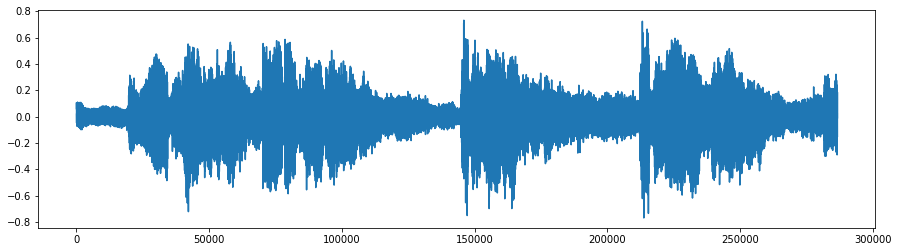

In [3]:
plt.plot(x[0])
ipd.Audio(x, rate=sr)

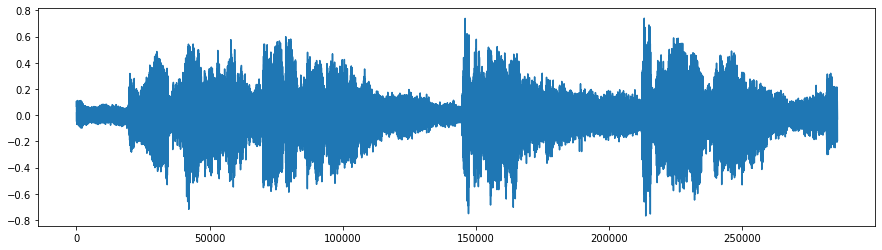

In [4]:
x_reconst = neural.inverse(neural(x)).detach().cpu().numpy()
plt.plot(x_reconst[0])
ipd.Audio(x_reconst, rate=sr)

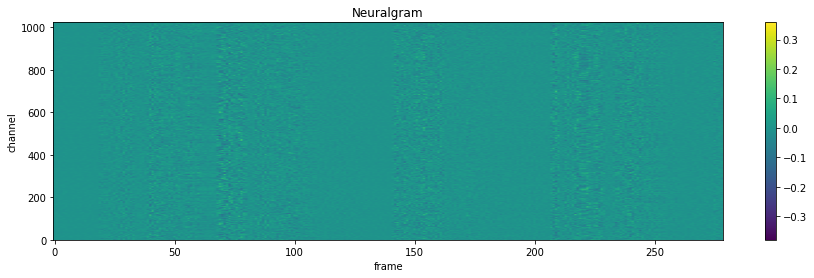

In [5]:
neu = neural(x)
plot_neuralgram(neu.detach().cpu().numpy()[0], title='Neuralgram', ylabel='channel')

In [6]:
neu_resized = resize(
    neu,
    (*neu.shape[1:-1], int(neu.shape[-1] * 2)),
    3 # see below
)

# from torchaudio source
# inverse_modes_mapping = {
#     0: InterpolationMode.NEAREST,
#     2: InterpolationMode.BILINEAR,
#     3: InterpolationMode.BICUBIC,
#     4: InterpolationMode.BOX,
#     5: InterpolationMode.HAMMING,
#     1: InterpolationMode.LANCZOS,
# }

In [7]:
x_reconst = neural.inverse(neu_resized).detach().cpu()

In [8]:
ipd.Audio(x_reconst.numpy(), rate=sr)

In [10]:
# torchaudio.save('reconstruct.wav', x_reconst, sr)